In [1]:
using HDF5, Printf, NNlib, Statistics, Plots, JLD, LinearAlgebra, Distributions

include("gillespie.jl")
include("PathwayElaboration.jl")
include("occupancyPlot.jl")

transationPlot (generic function with 3 methods)

In [2]:
cd("/Users/chenwei/Desktop/Github/RPE/code")
pwd()

"/Users/chenwei/Desktop/Github/RPE/code"

In [3]:
dataname = "synthetic50"

"synthetic50"

In [4]:
## Original data
data = load("data/original/$dataname.h5")
sep = hcat(split.(setdiff(keys(data),["states"]), "/")...)
# get dataset name
data_keys = Set(String.(sep[1, :]))
# get Si, Sf, energies, K
data_values = Set(String.(sep[2, :]))
# get coordinates
states = data["states"];

In [5]:
## Result CTMC
data_hat = load("data/results/$dataname.h5")
sep_hat = hcat(split.(setdiff(keys(data_hat)), "/")...)
# get dataset name (each dataset has different configuration, i.e. diff Si and Sf)
data_keys_hat = Set(String.(sep_hat[1, :]))
# get Khat, Shat, Si_hat, est_mfpt, obs_mfpt, Sf_hat
data_values_hat = Set(String.(sep_hat[2, :]));

In [6]:
# Exact CTMC arguments
Si = (data["side_basin2/Si"])
Si = Int(data["side_basin2/Si"][10])
Sf = data["side_basin2/Sf"]
Sf = Int(data["side_basin2/Sf"][10])
K = data["side_basin2/K"]
energy = data["side_basin2/energies"]

Si_hat = data_hat["side_basin2_10/Si_hat"]
Sf_hat = data_hat["side_basin2_10/Sf_hat"]
Shat = data_hat["side_basin2_10/Shat"]
Khat = data_hat["side_basin2_10/Khat"]
obs_mfpt = data_hat["side_basin2_10/obs_mfpt"]
est_mfpt = data_hat["side_basin2_10/est_mfpt"]
Si_hat, Sf_hat,size(Shat)


(1, 776, (1875,))

In [7]:
function getCoord(Shat,states,samples,Si_hat,Sf_hat)
    d = size(states)[2]
    l = length(Shat)    
    states_hat = zeros(l,d)
    for i=1:l
        states_hat[i,:] = states[Shat[i],:]
    end

    X=[];Y=[]
    for Trj in samples
        xx=[];yy=[]
        for trj in Trj
            x, y = states_hat[trj,:]
            append!(xx,x)
            append!(yy,y)
        end
        push!(X,xx)
        push!(Y,yy)
    end
    
    x_Si,y_Si=states_hat[Si_hat,:]
    x_Sf,y_Sf=states_hat[Sf_hat,:]

    return X,Y,x_Si,y_Si,x_Sf,y_Sf
end

getCoord (generic function with 1 method)

In [8]:
### gillespie samples on full matrix
N = 10 # number of samples
samples, t_per, t_total = gillespie(Si_hat, Khat, StoppingCondition(pred=AbsorbingStates([Sf_hat])), N);

In [9]:
Max_times=[]; Max_times_ids=[]
for i=1:N
    maxtime = findmax(t_per[i])[1]
    maxtimeid = samples[i][findmax(t_per[i])[2]]
    append!(Max_times,maxtime)
    append!(Max_times_ids,maxtimeid)
end
Max_times, Max_times_ids

(Any[1.0613906745667974e-6, 3.303010277539551e-6, 5.404907961280297e-6, 1.2423553136865439e-6, 9.775274287105371e-7, 2.500645617330932e-6, 9.797898442086695e-7, 3.691843536270795e-6, 6.513967755786511e-6, 3.783026077520483e-6], Any[1386, 833, 813, 1561, 767, 833, 1561, 836, 833, 819])

In [10]:
trj_t = hcat(samples[1],t_per[1]);
# Find the maxium time and its corresponding position
sorted_trj_t = sortslices(trj_t, dims=1, by=x->x[2],rev=true)
sorted_trj_t[1:1000,:]

1000×2 Matrix{Float64}:
 1386.0  1.06139e-6
    1.0  9.44493e-7
 1560.0  7.6443e-7
 1485.0  7.54332e-7
 1849.0  7.00897e-7
 1337.0  6.57783e-7
   19.0  6.50547e-7
 1522.0  5.84614e-7
   32.0  5.73081e-7
 1375.0  5.6889e-7
 1170.0  5.66958e-7
   92.0  5.54902e-7
  894.0  5.31329e-7
    ⋮    
 1487.0  4.68893e-8
 1678.0  4.67056e-8
  801.0  4.66804e-8
  779.0  4.664e-8
  961.0  4.65492e-8
 1547.0  4.65112e-8
 1397.0  4.63866e-8
   53.0  4.61528e-8
 1409.0  4.60275e-8
 1486.0  4.59558e-8
 1482.0  4.58544e-8
  999.0  4.55834e-8

In [13]:
X,Y,x_Si,y_Si,x_Sf,y_Sf = getCoord(Shat,states,samples,Si_hat,Sf_hat);

In [ ]:
plotlyjs()
# Plot different traj over time
plot(X,Y,t_per)

plot!([x_Si],[y_Si], [0],seriestype = :scatter, markersize=5, color=cgrad(:greys)[.9],)
        #series_annotations = [("I",:left,20)])
plot!([x_Sf],[y_Sf], [0], seriestype = :scatter, markersize=5, color=cgrad(:greens)[.1],)
        #series_annotations = [("F",:bottom,20)], right_margin = 4Plots.mm, left_margin = 4Plots.mm)


In [ ]:
gr()
# Plot different traj over time
X,Y,x_Si,y_Si,x_Sf,y_Sf = getCoord(Shat,states,samples,Si_hat,Sf_hat)
plot(X,Y,t_per)

┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/code/tmp.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/zozYv/src/animation.jl:114


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/code/tmp.gif")
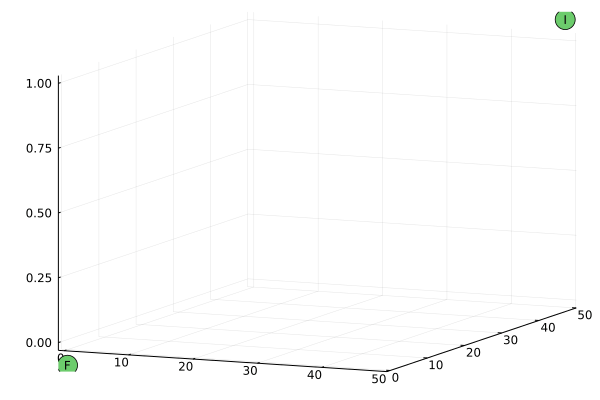

In [54]:
@gif for i in 1:length(X[1])
    plot(X[1][1:i],Y[1][1:i],t_per[1][1:i],legend=false)
    xlims!(-.9,50.1); ylims!(-.9,50.1);
    plot!([x_Si],[y_Si], seriestype = :scatter, markersize=12, color=cgrad(:greens)[.25],
    series_annotations = [("I",:center,8),("F",:center,8)])
    plot!([x_Sf],[y_Sf], seriestype = :scatter, markersize=12, color=cgrad(:greens)[.25],
    series_annotations = [("F",:center,8),("F",:center,8)], right_margin = 4Plots.mm, left_margin = 4Plots.mm)
end

┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/code/tmp.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/zozYv/src/animation.jl:114


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/code/tmp.gif")
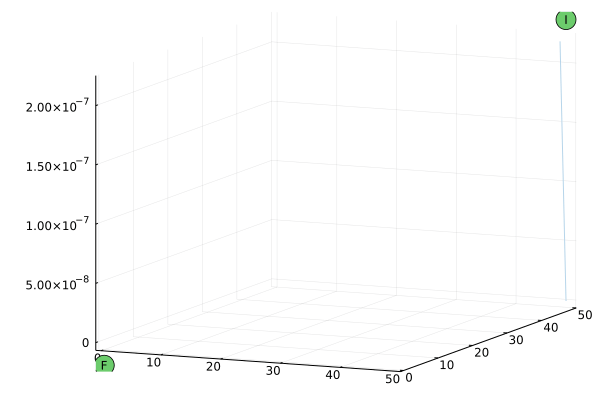

In [128]:
plot()
@gif for i in 1:length(X[1])
    plot!([x_Si],[y_Si], seriestype = :scatter, markersize=12, color=cgrad(:greens)[.25],
        series_annotations = [("I",:center,8)])
    plot!([x_Sf],[y_Sf], seriestype = :scatter, markersize=12, color=cgrad(:greens)[.25],
        series_annotations = [("F",:center,8)], right_margin = 4Plots.mm, left_margin = 4Plots.mm)
    xlims!(-.9,50.1); ylims!(-.9,50.1);
    if i < length(X[1])
        if t_per[1][i] > 3e-7
            plot!(X[1][i:i+1],Y[1][i:i+1],t_per[1][i:i+1],color=cgrad(:cool)[0.5],linewidth=3,legend=false)
        else
            plot!(X[1][i:i+1],Y[1][i:i+1],t_per[1][i:i+1],color=cgrad(:Blues)[0.3],legend=false)
        end    
    end
end

┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/code/tmp.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/zozYv/src/animation.jl:114


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/code/tmp.gif")
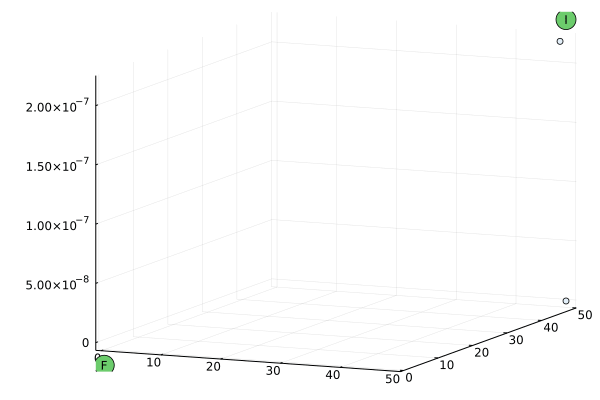

In [129]:
plot()
@gif for i in 1:length(X[1])
    plot!([x_Si],[y_Si], seriestype = :scatter, markersize=12, color=cgrad(:greens)[.25],
        series_annotations = [("I",:center,8)])
    plot!([x_Sf],[y_Sf], seriestype = :scatter, markersize=12, color=cgrad(:greens)[.25],
        series_annotations = [("F",:center,8)], right_margin = 4Plots.mm, left_margin = 4Plots.mm)
    xlims!(-.9,50.1); ylims!(-.9,50.1);
    if i < length(X[1])
        if t_per[1][i] > 5e-7
            scatter!(X[1][i:i+1],Y[1][i:i+1],t_per[1][i:i+1],color=cgrad(:cool)[0.1],markersize=8,legend=false)
        else
            scatter!(X[1][i:i+1],Y[1][i:i+1],t_per[1][i:i+1],color=cgrad(:Blues)[0.1],legend=false)
        end    
    end
end

┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/code/tmp.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/zozYv/src/animation.jl:114


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/code/tmp.gif")
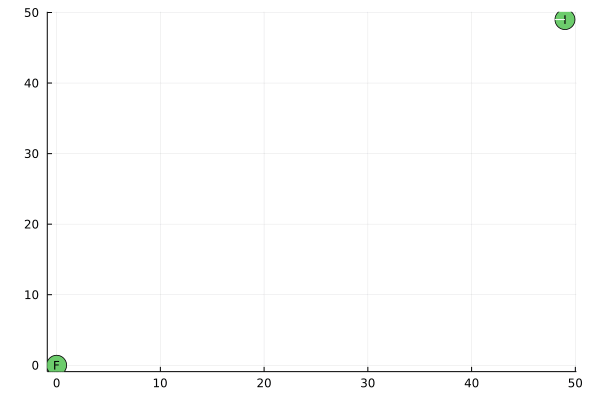

In [96]:
plot()
@gif for i in 1:length(X[1])
    plot!([x_Si],[y_Si], seriestype = :scatter, markersize=12, color=cgrad(:greens)[.25],
        series_annotations = [("I",:center,8)])
    plot!([x_Sf],[y_Sf], seriestype = :scatter, markersize=12, color=cgrad(:greens)[.25],
        series_annotations = [("F",:center,8)], right_margin = 4Plots.mm, left_margin = 4Plots.mm)
    xlims!(-.9,50.1); ylims!(-.9,50.1);

    if i < length(X[1])
        plot!(X[1][i:i+1],Y[1][i:i+1],color=cgrad(:Purples)[0+i/length(X[1])],legend=false)
    end
end

┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/code/tmp.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/zozYv/src/animation.jl:114


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/code/tmp.gif")
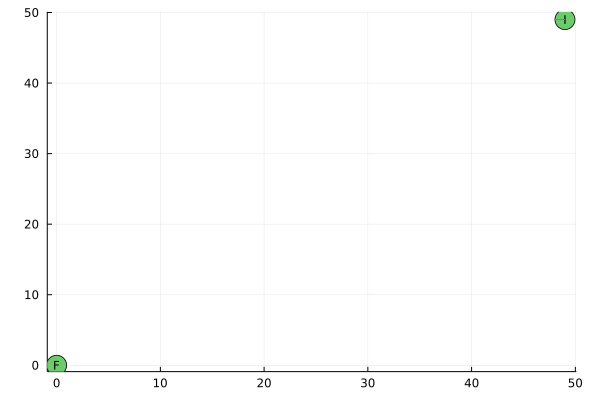

In [120]:
plot()
@gif for i in 1:length(X[1])
    plot!([x_Si],[y_Si], seriestype = :scatter, markersize=12, color=cgrad(:greens)[.25],
        series_annotations = [("I",:center,8)])
    plot!([x_Sf],[y_Sf], seriestype = :scatter, markersize=12, color=cgrad(:greens)[.25],
        series_annotations = [("F",:center,8)], right_margin = 4Plots.mm, left_margin = 4Plots.mm)
    xlims!(-.9,50.1); ylims!(-.9,50.1);



    if i < length(X[1])
        if t_per[1][i] > 5e-7
            plot!(X[1][i:i+1],Y[1][i:i+1],color=:red,linewidth=5,legend=false)
        else
            plot!(X[1][i:i+1],Y[1][i:i+1],color=:grey,legend=false)
        end
    end
end